In [2]:
import numpy as np
import nibabel as nib
import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tifffile import imsave

from sklearn.preprocessing import MinMaxScaler

In [12]:
TRAIN_DATASET_PATH ='C:/Users/sibel/Downloads/archive/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/'

In [13]:
test_image_flair = nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_flair.nii').get_fdata()
test_image_flair.max()

1854.603271484375

In [15]:
# Ölçekleyiciler 1D'ye uygulanır, bu nedenle yeniden şekillendirelim ve ardından orijinal şekline geri döndürelim.
scaler = MinMaxScaler()
test_image_flair=scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)

In [17]:
# diğerleri içinde aynı işlemi yapıyoruz

test_image_t1=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t1.nii').get_fdata()
test_image_t1=scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)

test_image_t1ce=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t1ce.nii').get_fdata()
test_image_t1ce=scaler.fit_transform(test_image_t1ce.reshape(-1, test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)

test_image_t2=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_t2.nii').get_fdata()
test_image_t2=scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)

test_mask=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_355/BraTS20_Training_355_seg.nii').get_fdata()
test_mask=test_mask.astype(np.uint8)

In [18]:
np.unique(test_mask)  #0, 1, 2, 4 (0, 1, 2, 3 olarak ayarlamamız gerekiyor)
test_mask[test_mask==4] = 3

In [19]:
np.unique(test_mask)

array([0, 1, 2, 3], dtype=uint8)

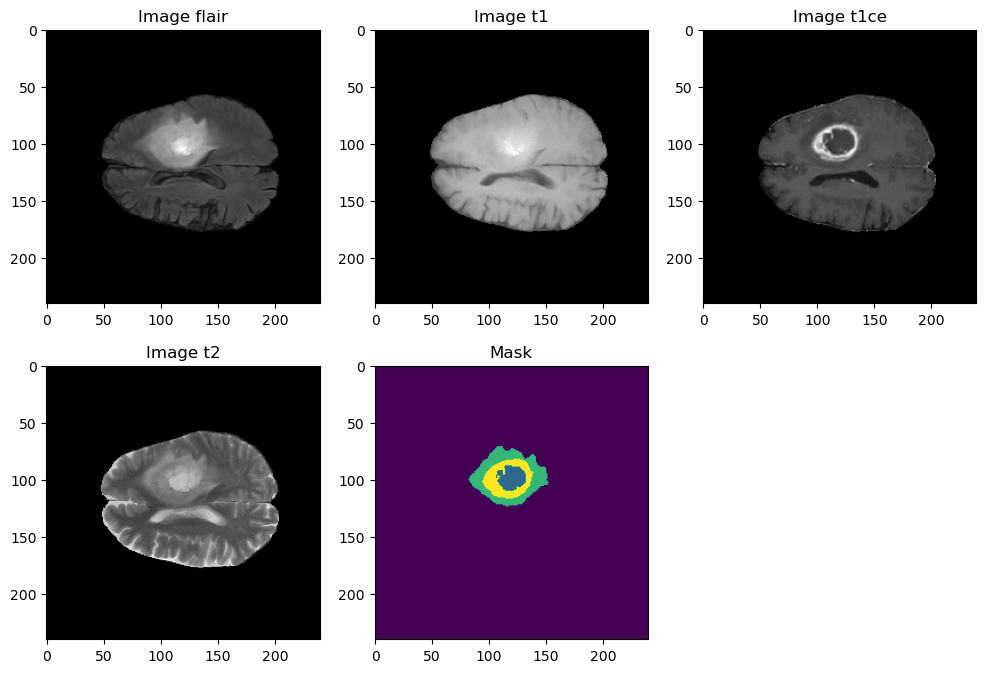

In [22]:
import random
n_slice=random.randint(0, test_mask.shape[2])

plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(test_image_flair[:,:,n_slice], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(test_image_t1[:,:,n_slice], cmap='gray')
plt.title('Image t1')
plt.subplot(233)
plt.imshow(test_image_t1ce[:,:,n_slice], cmap='gray')
plt.title('Image t1ce')
plt.subplot(234)
plt.imshow(test_image_t2[:,:,n_slice], cmap='gray')
plt.title('Image t2')
plt.subplot(235)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [23]:
#T1ce, t2 ve flair'ı tek çok kanallı görüntüde birleştirin

combined_x = np.stack([test_image_flair, test_image_t1ce, test_image_t2], axis=3)
combined_x.shape

(240, 240, 155, 3)

In [24]:
# veriler için kırpma yapalım
combined_x=combined_x[56:184, 56:184, 13:141] #128x128x128x4

test_mask = test_mask[56:184, 56:184, 13:141]

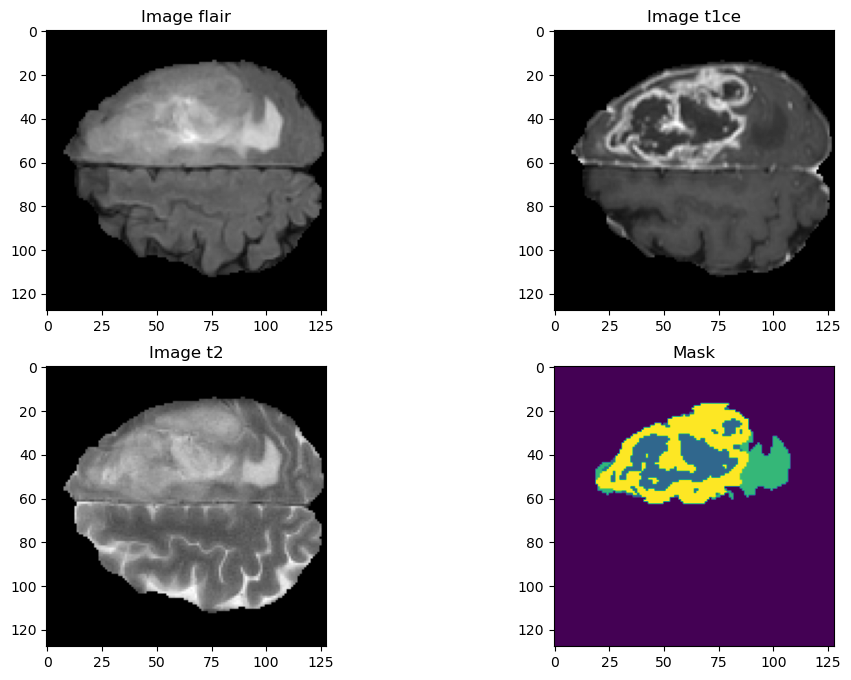

In [26]:
n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(combined_x[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(combined_x[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(combined_x[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [29]:
imsave(TRAIN_DATASET_PATH + 'combined355.tif', combined_x)
np.save(TRAIN_DATASET_PATH + 'combined355.npy', combined_x)

In [32]:
my_img=np.load(TRAIN_DATASET_PATH + 'combined355.npy')
my_img.shape

(128, 128, 128, 3)

In [33]:
test_mask = to_categorical(test_mask, num_classes=4)

In [35]:
test_mask.shape

(128, 128, 128, 4)

In [36]:
# glob, verilen adrese ait belitrilen uzantıda ki tüm dosya adreslerini listede de tutar
t2_list = sorted(glob.glob(TRAIN_DATASET_PATH + '*/*t2.nii'))
t1ce_list = sorted(glob.glob(TRAIN_DATASET_PATH + '*/*t1ce.nii'))
flair_list = sorted(glob.glob(TRAIN_DATASET_PATH + '*/*flair.nii'))
mask_list = sorted(glob.glob(TRAIN_DATASET_PATH + '*/*seg.nii'))

In [37]:
t2_list

['C:/Users/sibel/Downloads/archive/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\\BraTS20_Training_001\\BraTS20_Training_001_t2.nii',
 'C:/Users/sibel/Downloads/archive/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\\BraTS20_Training_002\\BraTS20_Training_002_t2.nii',
 'C:/Users/sibel/Downloads/archive/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\\BraTS20_Training_003\\BraTS20_Training_003_t2.nii',
 'C:/Users/sibel/Downloads/archive/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\\BraTS20_Training_004\\BraTS20_Training_004_t2.nii',
 'C:/Users/sibel/Downloads/archive/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\\BraTS20_Training_005\\BraTS20_Training_005_t2.nii',
 'C:/Users/sibel/Downloads/archive/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\\BraTS20_Training_006\\BraTS20_Training_006_t2.nii',
 'C:/Users/sibel/Downloads/archive/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData\\BraTS20_Training_007\\BraTS20_Training_007_t2.nii',
 'C:/Users/si

In [39]:
#üste veriyi incelemek için yaptığımız işlemi tüm verilerde yapalım

for img in range(len(t2_list)):   #Using t1_list as all lists are of same size
    print("Now preparing image and masks number: ", img)
      
    temp_image_t2=nib.load(t2_list[img]).get_fdata()
    temp_image_t2=scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)
   
    temp_image_t1ce=nib.load(t1ce_list[img]).get_fdata()
    temp_image_t1ce=scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)
   
    temp_image_flair=nib.load(flair_list[img]).get_fdata()
    temp_image_flair=scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)
        
    temp_mask=nib.load(mask_list[img]).get_fdata()
    temp_mask=temp_mask.astype(np.uint8)
    temp_mask[temp_mask==4] = 3  #Reassign mask values 4 to 3
    #print(np.unique(temp_mask))
    
    
    temp_combined_images = np.stack([temp_image_flair, temp_image_t1ce, temp_image_t2], axis=3)
    
    #Crop to a size to be divisible by 64 so we can later extract 64x64x64 patches. 
    #cropping x, y, and z
    temp_combined_images=temp_combined_images[56:184, 56:184, 13:141]
    temp_mask = temp_mask[56:184, 56:184, 13:141]
    
    val, counts = np.unique(temp_mask, return_counts=True)
    
    if (1 - (counts[0]/counts.sum())) > 0.01:  #At least 1% useful volume with labels that are not 0
        print("Save Me")
        temp_mask= to_categorical(temp_mask, num_classes=4)
        np.save('C:/Users/sibel/Downloads/archive/BraTS2020_TrainingData/input_data_3channels/images/image_'+str(img)+'.npy', temp_combined_images)
        np.save('C:/Users/sibel/Downloads/archive/BraTS2020_TrainingData/input_data_3channels/masks/mask_'+str(img)+'.npy', temp_mask)
        
    else:
        print("I am useless") 

Now preparing image and masks number:  0
Save Me
Now preparing image and masks number:  1
Save Me
Now preparing image and masks number:  2
Save Me
Now preparing image and masks number:  3
Save Me
Now preparing image and masks number:  4
I am useless
Now preparing image and masks number:  5
Save Me
Now preparing image and masks number:  6
Save Me
Now preparing image and masks number:  7
Save Me
Now preparing image and masks number:  8
Save Me
Now preparing image and masks number:  9
Save Me
Now preparing image and masks number:  10
Save Me
Now preparing image and masks number:  11
Save Me
Now preparing image and masks number:  12
Save Me
Now preparing image and masks number:  13
Save Me
Now preparing image and masks number:  14
Save Me
Now preparing image and masks number:  15
Save Me
Now preparing image and masks number:  16
Save Me
Now preparing image and masks number:  17
Save Me
Now preparing image and masks number:  18
Save Me
Now preparing image and masks number:  19
Save Me
Now p

Save Me
Now preparing image and masks number:  162
Save Me
Now preparing image and masks number:  163
Save Me
Now preparing image and masks number:  164
Save Me
Now preparing image and masks number:  165
Save Me
Now preparing image and masks number:  166
Save Me
Now preparing image and masks number:  167
Save Me
Now preparing image and masks number:  168
Save Me
Now preparing image and masks number:  169
Save Me
Now preparing image and masks number:  170
Save Me
Now preparing image and masks number:  171
Save Me
Now preparing image and masks number:  172
Save Me
Now preparing image and masks number:  173
Save Me
Now preparing image and masks number:  174
Save Me
Now preparing image and masks number:  175
Save Me
Now preparing image and masks number:  176
I am useless
Now preparing image and masks number:  177
Save Me
Now preparing image and masks number:  178
Save Me
Now preparing image and masks number:  179
Save Me
Now preparing image and masks number:  180
Save Me
Now preparing imag

Save Me
Now preparing image and masks number:  322
Save Me
Now preparing image and masks number:  323
Save Me
Now preparing image and masks number:  324
I am useless
Now preparing image and masks number:  325
Save Me
Now preparing image and masks number:  326
Save Me
Now preparing image and masks number:  327
Save Me
Now preparing image and masks number:  328
Save Me
Now preparing image and masks number:  329
Save Me
Now preparing image and masks number:  330
Save Me
Now preparing image and masks number:  331
Save Me
Now preparing image and masks number:  332
Save Me
Now preparing image and masks number:  333
Save Me
Now preparing image and masks number:  334
Save Me
Now preparing image and masks number:  335
Save Me
Now preparing image and masks number:  336
Save Me
Now preparing image and masks number:  337
Save Me
Now preparing image and masks number:  338
Save Me
Now preparing image and masks number:  339
Save Me
Now preparing image and masks number:  340
I am useless
Now preparing

In [44]:
import splitfolders

input_folder = 'D:/archive/BraTS2020_TrainingData/input_data_3channels/'
output_folder = 'D:/archive/BraTS2020_TrainingData/input_data_128/'

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25), group_prefix=None) # default values




Copying files: 0 files [00:00, ? files/s]


Copying files: 1 files [00:01,  1.66s/ files]


Copying files: 2 files [00:02,  1.21s/ files]


Copying files: 3 files [00:03,  1.01 files/s]


Copying files: 4 files [00:04,  1.01 files/s]


Copying files: 5 files [00:05,  1.02 files/s]


Copying files: 6 files [00:06,  1.01 files/s]


Copying files: 7 files [00:07,  1.00s/ files]


Copying files: 8 files [00:08,  1.05s/ files]


Copying files: 9 files [00:10,  1.29s/ files]


Copying files: 10 files [00:12,  1.46s/ files]


Copying files: 11 files [00:13,  1.49s/ files]


Copying files: 12 files [00:15,  1.56s/ files]


Copying files: 13 files [00:17,  1.62s/ files]


Copying files: 14 files [00:18,  1.62s/ files]


Copying files: 15 files [00:20,  1.62s/ files]


Copying files: 16 files [00:22,  1.64s/ files]


Copying files: 17 files [00:23,  1.51s/ files]


Copying files: 18 files [00:25,  1.60s/ files]


Copying files: 19 files [00:27,  1.81s/ files]


Copying files: 20 files [00:28,

Copying files: 140 files [03:51,  1.47s/ files]


Copying files: 141 files [03:53,  1.69s/ files]


Copying files: 142 files [03:55,  1.60s/ files]


Copying files: 143 files [03:56,  1.57s/ files]


Copying files: 144 files [03:58,  1.61s/ files]


Copying files: 145 files [04:00,  1.73s/ files]


Copying files: 146 files [04:01,  1.56s/ files]


Copying files: 147 files [04:02,  1.45s/ files]


Copying files: 148 files [04:04,  1.56s/ files]


Copying files: 149 files [04:05,  1.45s/ files]


Copying files: 150 files [04:06,  1.40s/ files]


Copying files: 151 files [04:08,  1.48s/ files]


Copying files: 152 files [04:10,  1.56s/ files]


Copying files: 153 files [04:11,  1.55s/ files]


Copying files: 154 files [04:13,  1.47s/ files]


Copying files: 155 files [04:14,  1.50s/ files]


Copying files: 156 files [04:16,  1.56s/ files]


Copying files: 157 files [04:18,  1.56s/ files]


Copying files: 158 files [04:20,  1.71s/ files]


Copying files: 159 files [04:22,  1.77s/ files]




Copying files: 278 files [07:31,  1.61s/ files]


Copying files: 279 files [07:34,  1.83s/ files]


Copying files: 280 files [07:34,  1.54s/ files]


Copying files: 281 files [07:36,  1.40s/ files]


Copying files: 282 files [07:38,  1.56s/ files]


Copying files: 283 files [07:39,  1.67s/ files]


Copying files: 284 files [07:41,  1.60s/ files]


Copying files: 285 files [07:42,  1.49s/ files]


Copying files: 286 files [07:43,  1.46s/ files]


Copying files: 287 files [07:46,  1.67s/ files]


Copying files: 288 files [07:47,  1.68s/ files]


Copying files: 289 files [07:49,  1.60s/ files]


Copying files: 290 files [07:50,  1.60s/ files]


Copying files: 291 files [07:52,  1.68s/ files]


Copying files: 292 files [07:53,  1.47s/ files]


Copying files: 293 files [07:54,  1.37s/ files]


Copying files: 294 files [07:57,  1.71s/ files]


Copying files: 295 files [07:58,  1.61s/ files]


Copying files: 296 files [08:00,  1.54s/ files]


Copying files: 297 files [08:01,  1.56s/ files]




Copying files: 416 files [10:38,  1.03s/ files]


Copying files: 417 files [10:39,  1.10s/ files]


Copying files: 418 files [10:40,  1.10s/ files]


Copying files: 419 files [10:41,  1.09s/ files]


Copying files: 420 files [10:42,  1.04s/ files]


Copying files: 421 files [10:43,  1.14s/ files]


Copying files: 422 files [10:45,  1.17s/ files]


Copying files: 423 files [10:46,  1.19s/ files]


Copying files: 424 files [10:47,  1.10s/ files]


Copying files: 425 files [10:48,  1.05s/ files]


Copying files: 426 files [10:49,  1.04s/ files]


Copying files: 427 files [10:50,  1.16s/ files]


Copying files: 428 files [10:51,  1.23s/ files]


Copying files: 429 files [10:52,  1.13s/ files]


Copying files: 430 files [10:53,  1.09s/ files]


Copying files: 431 files [10:54,  1.08s/ files]


Copying files: 432 files [10:56,  1.12s/ files]


Copying files: 433 files [10:57,  1.17s/ files]


Copying files: 434 files [10:58,  1.02s/ files]


Copying files: 435 files [10:58,  1.02 files/s]




Copying files: 554 files [13:08,  1.09s/ files]


Copying files: 555 files [13:09,  1.13s/ files]


Copying files: 556 files [13:10,  1.12s/ files]


Copying files: 557 files [13:11,  1.03s/ files]


Copying files: 558 files [13:13,  1.11s/ files]


Copying files: 559 files [13:13,  1.07s/ files]


Copying files: 560 files [13:15,  1.09s/ files]


Copying files: 561 files [13:15,  1.01s/ files]


Copying files: 562 files [13:16,  1.07 files/s]


Copying files: 563 files [13:18,  1.15s/ files]


Copying files: 564 files [13:19,  1.11s/ files]


Copying files: 565 files [13:20,  1.12s/ files]


Copying files: 566 files [13:21,  1.09s/ files]


Copying files: 567 files [13:22,  1.05 files/s]


Copying files: 568 files [13:23,  1.02 files/s]


Copying files: 569 files [13:24,  1.08s/ files]


Copying files: 570 files [13:25,  1.03 files/s]


Copying files: 571 files [13:26,  1.02 files/s]


Copying files: 572 files [13:27,  1.16s/ files]


Copying files: 573 files [13:29,  1.27s/ files]


